In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

D:\python\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    "PLD_3_Classes_256/Training",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 3251 files belonging to 3 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    "PLD_3_Classes_256/Validation",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 416 files belonging to 3 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [5]:
validation_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [6]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[184.   200.   213.  ]
   [184.   200.   213.  ]
   [184.   200.   213.  ]
   ...
   [216.   232.   248.  ]
   [217.   233.   249.  ]
   [217.5  233.5  249.5 ]]

  [[184.   200.   213.  ]
   [184.   200.   213.  ]
   [184.   200.   213.  ]
   ...
   [216.   232.   248.  ]
   [217.   233.   249.  ]
   [217.5  233.5  249.5 ]]

  [[184.   200.   213.  ]
   [184.   200.   213.  ]
   [184.   200.   213.  ]
   ...
   [216.   232.   248.  ]
   [217.   233.   249.  ]
   [217.5  233.5  249.5 ]]

  ...

  [[194.   210.   225.  ]
   [194.   210.   225.  ]
   [194.   210.   225.  ]
   ...
   [214.   227.   236.  ]
   [213.   226.   235.  ]
   [212.5  225.5  234.5 ]]

  [[194.   210.   225.  ]
   [194.   210.   225.  ]
   [194.   210.   225.  ]
   ...
   [214.   227.   236.  ]
   [213.   226.   235.  ]
   [212.5  225.5  234.5 ]]

  [[194.   210.   225.  ]
   [194.   210.   225.  ]
   [194.   210.   225.  ]
   ...
   [214.   227.   236.  ]
   [213.   226.   235.  ]
   [212.5  225.5  23

### to avoid overshooting
1. choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of underfitting, so increases number of neuron
3. Add more Convolution layer to extract more feature from images there may be possibility that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Model Building

In [7]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation="relu",input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
model.add(Conv2D(filters=64,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=128,kernel_size=3,padding="same",activation="relu"))
model.add(Conv2D(filters=128,kernel_size=3,padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=256,kernel_size=3,padding="same",activation="relu"))
model.add(Conv2D(filters=256,kernel_size=3,padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=512,kernel_size=3,padding="same",activation="relu"))
model.add(Conv2D(filters=512,kernel_size=3,padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Dropout(0.25)) #to avoid overfitting

In [15]:
model.add(Flatten())
model.add(Dense(units=1500,activation="relu"))

In [16]:
model.add(Dropout(0.4)) #to avoid overfitting

In [17]:
#output layer
model.add(Dense(units=3,activation="softmax"))

## Compiling Model

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001),loss = "categorical_crossentropy",metrics = ["accuracy"])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

## Model Training

In [20]:
training_history = model.fit(x=training_set,validation_data = validation_set ,epochs=5,batch_size=64)

Epoch 1/5
102/102 [==============================] - 222s 2s/step - loss: 1.3972 - accuracy: 0.4180 - val_loss: 0.9254 - val_accuracy: 0.6274
Epoch 2/5
102/102 [==============================] - 390s 4s/step - loss: 0.7714 - accuracy: 0.6770 - val_loss: 0.5966 - val_accuracy: 0.7212
Epoch 3/5
102/102 [==============================] - 634s 6s/step - loss: 0.5375 - accuracy: 0.7976 - val_loss: 0.4922 - val_accuracy: 0.8269
Epoch 4/5
102/102 [==============================] - 610s 6s/step - loss: 0.3840 - accuracy: 0.8517 - val_loss: 0.3622 - val_accuracy: 0.8534
Epoch 5/5
102/102 [==============================] - 237s 2s/step - loss: 0.3208 - accuracy: 0.8794 - val_loss: 0.2922 - val_accuracy: 0.8894


## Mdoel Evaluation

In [21]:
#Model Evaluation on training set
train_loss,train_acc = model.evaluate(training_set)

102/102 [==============================] - 42s 409ms/step - loss: 0.2611 - accuracy: 0.9074


In [22]:
print(train_loss,train_acc)

0.2610885500907898 0.907413125038147


## Saving Model

In [23]:
model.save("trained_model.h5")

D:\python\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
model.save("trained_model.keras")

In [25]:
training_history.history

{'loss': [1.397167444229126,
  0.7713753581047058,
  0.5374636650085449,
  0.38403016328811646,
  0.32082000374794006],
 'accuracy': [0.4180252254009247,
  0.6770224571228027,
  0.7976007461547852,
  0.851737916469574,
  0.8794217109680176],
 'val_loss': [0.9253542423248291,
  0.5965977311134338,
  0.49221163988113403,
  0.3622322380542755,
  0.2921588718891144],
 'val_accuracy': [0.6274038553237915,
  0.7211538553237915,
  0.8269230723381042,
  0.8533653616905212,
  0.8894230723381042]}

In [26]:
#recording history in json
import json 
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

## Accuracy Visualization

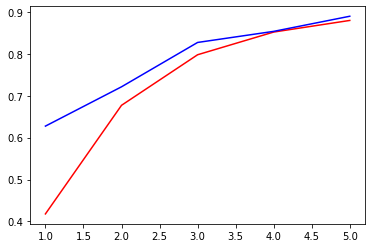

In [27]:
epochs = [i for i in range(1,6)]
plt.plot(epochs,training_history.history['accuracy'],color = "red",label="Train")
plt.plot(epochs,training_history.history['val_accuracy'],color = "blue",label="Train")
plt.show()

## Some other metics for model evaluationm

In [28]:
class_name = validation_set.class_names
class_name

['Early_Blight', 'Healthy', 'Late_Blight']

In [29]:
test_set = tf.keras.utils.image_dataset_from_directory(
    "PLD_3_Classes_256/Testing",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 405 files belonging to 3 classes.


In [30]:
y_pred = model.predict(test_set)

13/13 [==============================] - 6s 398ms/step


In [31]:
y_pred,y_pred.shape

(array([[2.1663983e-01, 7.5696832e-01, 2.6391804e-02],
        [9.6718574e-01, 2.2027869e-02, 1.0786464e-02],
        [9.1142273e-01, 4.4820454e-02, 4.3756843e-02],
        ...,
        [8.0802958e-05, 6.3508181e-09, 9.9991918e-01],
        [4.8825459e-05, 8.2745877e-10, 9.9995112e-01],
        [5.9284493e-03, 5.2070195e-06, 9.9406636e-01]], dtype=float32),
 (405, 3))

In [32]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [33]:
predicted_categories

<tf.Tensor: shape=(405,), dtype=int64, numpy=
array([1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 2, 0, 0,
       0, 0, 2, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
     

In [34]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(405, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)>

In [35]:
y_true = tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(405,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
     

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

              precision    recall  f1-score   support

Early_Blight       0.89      0.82      0.86       162
     Healthy       0.81      0.89      0.85       102
 Late_Blight       0.91      0.93      0.92       141

    accuracy                           0.88       405
   macro avg       0.87      0.88      0.88       405
weighted avg       0.88      0.88      0.88       405



In [38]:
cm = confusion_matrix(y_true,predicted_categories)
cm

array([[133,  18,  11],
       [  9,  91,   2],
       [  7,   3, 131]], dtype=int64)

## confusion Matrix Visualization

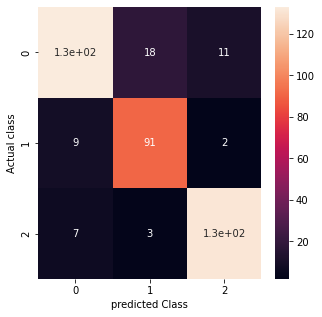

In [39]:
plt.figure(figsize = (5,5))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted Class")
plt.ylabel("Actual class")
plt.show()